<p>
<img src="./imgs/EII-ULPGC-logo.jpeg" width="430px" align="right">

# **Template Matching**
https://docs.opencv.org/4.x/de/da9/tutorial_template_matching.html

El **template matching** (búsqueda por plantilla) es una técnica clásica de visión por computador para **localizar en una imagen grande** (imagen “escena”) una **pequeña imagen patrón** (la “plantilla”) comparando cómo de bien encaja la plantilla en cada posición de la escena. La medida de similitud puede ser tan simple como la suma de diferencias o más sofisticada como la correlación cruzada normalizada.

## **¿Cómo funciona?**

1. Se "desliza" la plantilla por la imagen escena.
2. En cada posición se calcula una **medida de similitud** entre la plantilla y la ventana de imagen del mismo tamaño.
3. Se obtiene un **mapa de respuesta**; los **mínimos** indican dónde la plantilla se parece más a la escena.

## **Pros y contras**

**Ventajas**

* Muy sencillo de entender e implementar.
* Eficiente si el tamaño es moderado o si se usa FFT/pirámides.
* Funciona bien cuando el objeto aparece **con la misma apariencia** (textura/iluminación) y cambios limitados.

**Limitaciones**

* Sensible a **cambios de escala, rotación, oclusiones y deformaciones** (a menos que se trate explícitamente).
* Menos robusto ante **cambios de iluminación** (si no se normaliza).
* Puede dar **falsos positivos** en escenas con texturas repetitivas.


2025-09-25 19:26:05.836 Python[1457:129723787] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


KeyboardInterrupt: 

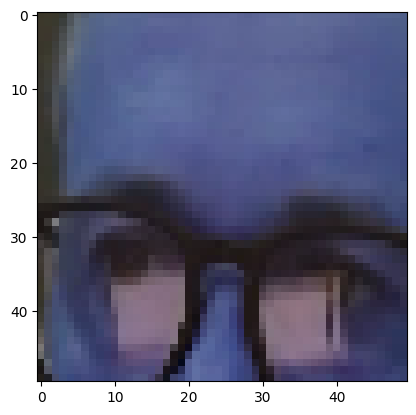

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# Function serach for the best match
def find_matching(image, template):
    # Convert to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # Find the width and height of template in the image
    w, h = template_gray.shape[::-1]
    # Apply template Matching
    res = cv2.matchTemplate(image_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Get the best match position
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # Get the top-left position
    top_left = max_loc
    # Get the bottom-right position
    bottom_right = (top_left[0] + w, top_left[1] + h)
    # Draw a rectangle around the matched region.
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    return image
    
    
# Function gets a ROI from the center of the image
def get_roi(image, roi_size):
    # Get the image size
    height, width = image.shape[:2]
    # Get the ROI size
    roi_height, roi_width = roi_size
    # Calculate the ROI position
    x = int((width - roi_width)/2)
    y = int((height - roi_height)/2)
    # Get the ROI from the image
    roi = image[y:y+roi_height, x:x+roi_width]
    return roi


cap = cv2.VideoCapture(1)

_, frame = cap.read()
frame = cv2.resize(frame, (400, 300))
template = get_roi(frame, (50, 50))

# Show the template
plt.imshow(template)

while(1):
    # Take each frame
    _, frame = cap.read()
    frame = cv2.resize(frame, (400, 300))
    # Search for the template
    frame = find_matching(frame, template)
    # Show the image
    cv2.imshow('Imagen',frame)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

